<a href="https://colab.research.google.com/github/Amitkundu22/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

##**Importing The Libraries**

In [102]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import zscore


#**Importing and loading our dataset**

In [103]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# reading csv file
file_path ='/content/drive/MyDrive/data_YesBank_StockPrices.csv'
df=pd.read_csv(file_path)

In [105]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [106]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


#**Understanding of Dataset**

In [107]:
df.shape

(185, 5)

In [108]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [109]:
#detail informations of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [110]:
# statistical summary of our data
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


From above we can conclude that:

* The shape of our dataset is 185 rows and 5 columns

* We need to change the date column's datatype from "object" to "datetime."

In [111]:
# Converting objective data-type to datetime format
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


#**DATA CLEANING**
### *Null value Treatment
###* Check Duplicates
###*Outlier Detection

In [113]:
# Checking Null Values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [114]:
#Checking duplicate values
df.duplicated().sum()

0


### There are no duplicate and null values has been found 

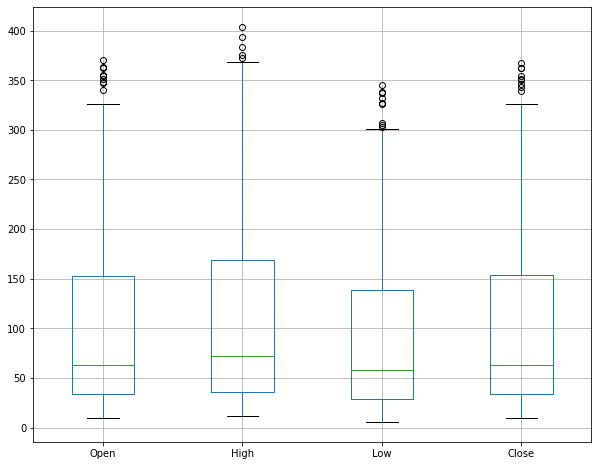

In [115]:
# Checking outliers
plt.figure(figsize=(10,8))
df.boxplot(['Open','High','Low','Close'])
plt.show()

###Now we have a cleaned Dataset, so we can go on to the visualisation process.

#**Exploratory Data Analysis**

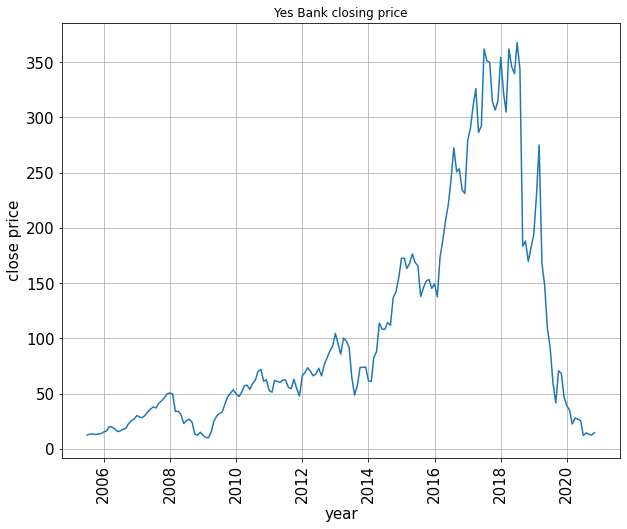

In [116]:
# ploting the close price
plt.figure(figsize=(10,8))
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price')
plt.xlabel('year',fontsize=15)
plt.ylabel('close price',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

###This plot is showing different scenario in different time-duration, After 2018 there is a suddern fall in the stock closing price due to fraud case of Rana Kapoor.

#**Univariate Analysis**

###Distribution of dependent variable [close price of stock]

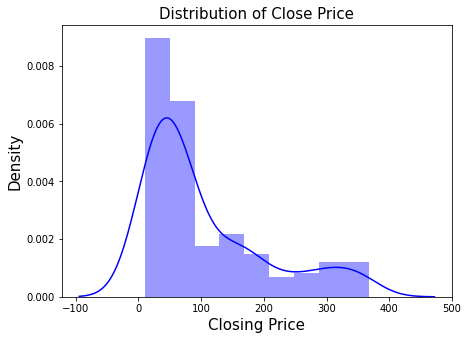

In [117]:
# checking the distribution of our dependent variable
plt.figure(figsize=(7,5))
sns.distplot(df['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=15) 
plt.xlabel('Closing Price',fontsize= 15)
plt.ylabel('Density',fontsize=15)
plt.show()


### From this chart its clear that the distribution of Stock Closing Price is rightly skewed.To make it normal we will use log transformation method.

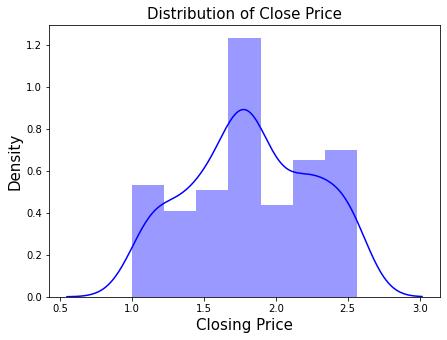

In [118]:
# Applying log transformation on Distribution of Close Price
plt.figure(figsize=(7,5))
sns.distplot(np.log10(df['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=15) 
plt.xlabel('Closing Price',fontsize= 15)
plt.ylabel('Density',fontsize=15)
plt.show()

###We transformed it using log transformation because it was positively skewed.Now it looks more normal now.



###For all of our independent variables, we will use Distplot to check the distribution.
###Independent Variable [Open , High and Low price of stock]

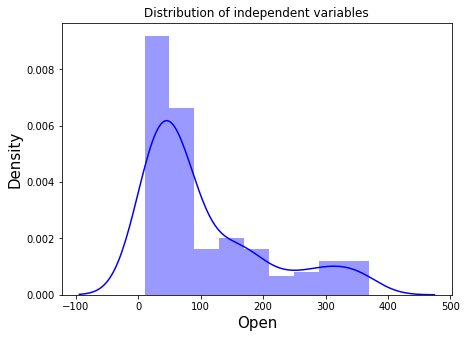

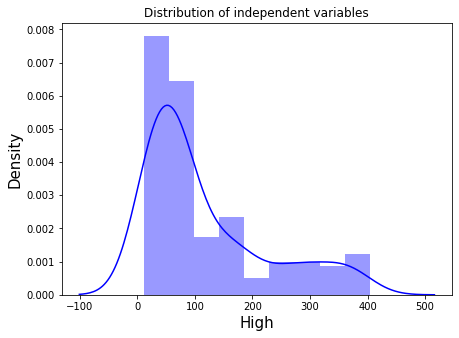

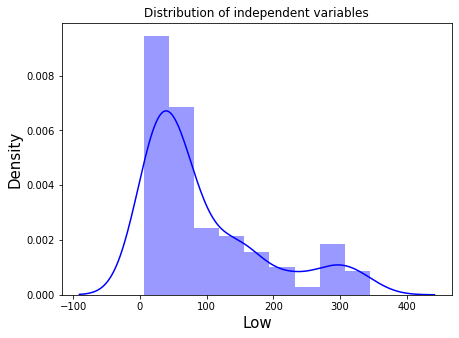

In [119]:
# Ploting distribution of numerical features

# ploting Distribution of 'open' Column
plt.figure(figsize=(7,5))
sns.distplot(df['Open'],color='Blue')
plt.xlabel('Open',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of independent variables')
plt.show()

# Ploting Diatribution of 'High' column
plt.figure(figsize=(7,5))
sns.distplot(df['High'],color='Blue')
plt.xlabel('High',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of independent variables')
plt.show()

# Ploting Diatribution of 'Low' column
plt.figure(figsize=(7,5))
sns.distplot(df['Low'],color='Blue')
plt.xlabel('Low',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of independent variables')
plt.show()

### It seems Independent variables are rightly skewed.Lets use log transformation to make it normal

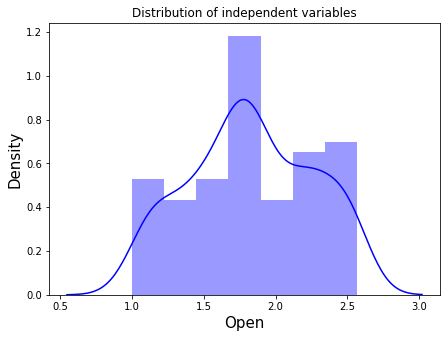

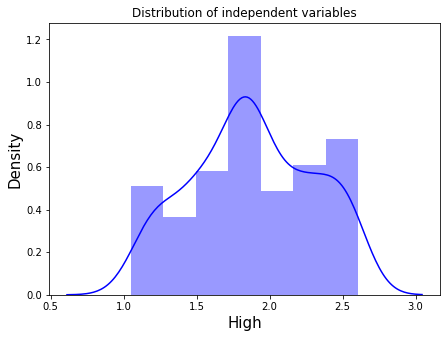

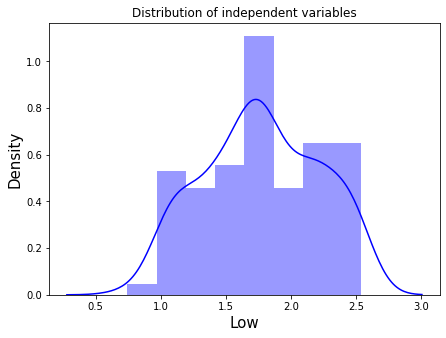

In [120]:
# Ploting distribution of numerical features using log transformation

# ploting Distribution of 'open' Column
plt.figure(figsize=(7,5))
sns.distplot(np.log10(df['Open']),color='Blue')
plt.xlabel('Open',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of independent variables')
plt.show()

# Ploting Diatribution of 'High' column
plt.figure(figsize=(7,5))
sns.distplot(np.log10(df['High']),color='Blue')
plt.xlabel('High',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of independent variables')
plt.show()

# Ploting Diatribution of 'Low' column
plt.figure(figsize=(7,5))
sns.distplot(np.log10(df['Low']),color='Blue')
plt.xlabel('Low',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of independent variables')
plt.show()

###All independent variable distributions were transformed to a nearly normal distribution after performing the log transformation.

#**Bivariate Analysis**
###Now we will see the relation between dependent and independent variables using scatter plot 



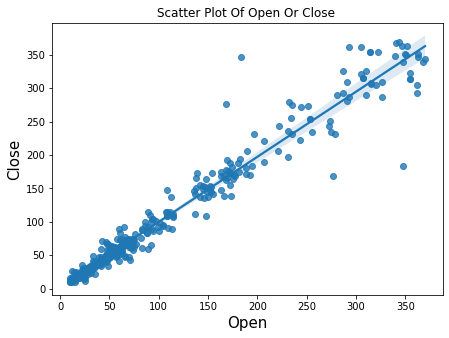

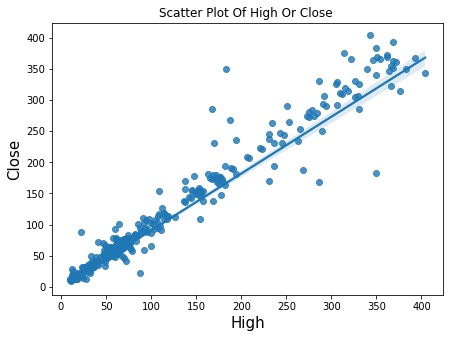

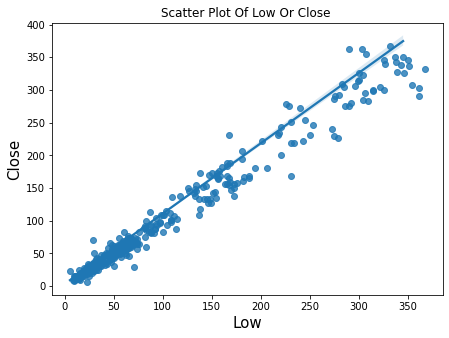

In [121]:

# scatter plot to see the relationship between dependent & independent variables

plt.figure(figsize=(7,5))
plt.scatter(df['Close'], df['Open'], alpha=0.8)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open',fontsize=15)
plt.ylabel('Class',fontsize=15)
sns.regplot(x ='Open', y = 'Close', data= df)
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(df['Close'], df['High'], alpha=0.8)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('Open',fontsize=15)
plt.ylabel('Class',fontsize=15)
sns.regplot(x ='High', y = 'Close', data= df)
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(df['Close'], df['Low'], alpha=0.8)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low',fontsize=15)
plt.ylabel('Class',fontsize=15)
sns.regplot(x ='Low', y = 'Close', data= df)
plt.show()

###It is obvious from the table above that all independent variables have a strong correlation with our dependent variable.

###Looking for correlation between the variables


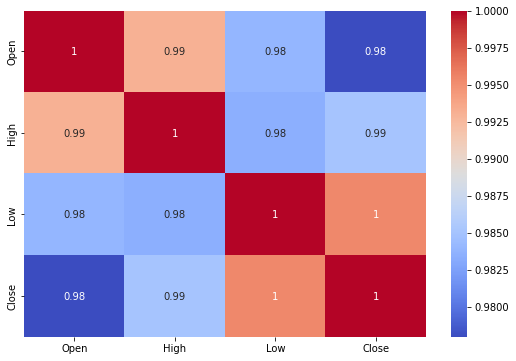

In [122]:
# Correlation Between the Variables
corr = df.corr()
plt.figure(figsize = (9,6))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

####The high correlation between the independent variables as found from above result, causes multicollinearity. High multicollinearity is undesirable for model fitting and prediction because even a little change in any independent variable can provide wildly unpredictable results.
####In order to check multicollinearity and how much it present in our dataset, we have to calculate VIF(Variation Inflation Factor)

##M**ulticollinearity**

####Multiple independent variables in a model that are correlating from a statistical concept is known as multi - collinearity. Calculating VIF(Variation Inflation Factor) will allow us to determine the presence of multicollinearity in our dataset and its extent.

##**Variance Inflation Factor(VIF):**

####A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.

In [123]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)
     

calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


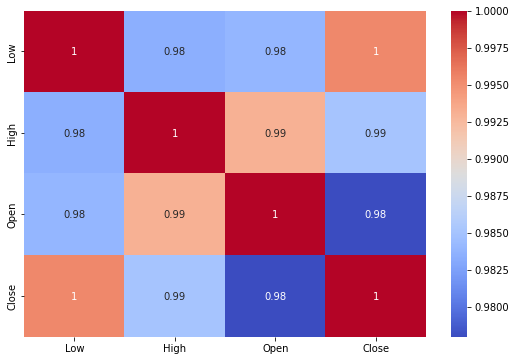

In [124]:
#Lets find correlation with heatmap
plt.figure(figsize=(9,6))
sns.heatmap(df[['Low','High','Open','Close']].corr(),annot=True,cmap='coolwarm')
plt.show()

####Any variable with a VIF of more than 5 is typically regarded as multicollinear.

####The general rule is to drop the variable with the highest VIF, but you can choose the variable to be eliminated depending on business logic.In this case there are few options available and each feature is equally significant here.

#**Model Building**

###For our DataSet, we will create a total of 5 regression models.

Linear Regression

Lasso Regression(L1 Regularization)

Ridge Regression(L2 Regularization)

Elastic Net Regression(L1+L2)

XG Boost Regression

#**Splitting data in Train and Test**

###Splitting data

####X = Independent variable

####Y = Dependent variable

In [125]:
#Spliting our data into Independent and Dependent variable
x= df.drop(columns=['Close','Date'])
y = df['Close']

In [126]:
# Transforming the data
x = x.apply(zscore)
y = np.log10(y)

###Splitting train test data with 80-20

In [127]:
# splitting the dataset into the training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 1)

#shape of training dataset.
print(f'shape of X_train set: {x_train.shape}')

#shape of testing dataset.
print(f'shape of X_test set: {x_test.shape}')

shape of X_train set: (148, 3)
shape of X_test set: (37, 3)


#**1.Linear Regression**

####Linear regression is defined as an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events.

In [128]:
# Data fitting in linear regression

# from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [129]:
#Checking the traning accuracy of linear regression model
round(linear_reg.score(x_train,y_train), 4)


0.8147

In [130]:
#Checking the testing accuracy of liner regression model
round(linear_reg.score(x_test,y_test), 4)


0.8226

In [131]:
#Predict y_test on the basis of train sets
y_pred = linear_reg.predict(x_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [132]:
np.array(y_test)


array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [133]:
#Creating DataFrames of test and train dataset
train_Dataset = pd.DataFrame(x_train,y_train)
test_Dataset = pd.DataFrame(y_test)
test_Dataset.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [134]:
test_Dataset['Predicted Closing Price']= y_pred
test_Dataset.head()

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.517387
179,1.408240,1.532118
66,1.720903,1.635190
40,1.088490,1.475394
166,2.170115,2.014715


#**Evaluation Matrics of Linear Regression**
####There are many different types of evaluation metrics available to test a model. In this project we will mainly use following evaluation metrics:
MSE(Mean Squared Error)

RMSE(Root Mean Squared Error)

MAE(Mean Absolute Error)

MAPE(Mean Absolute Percentage Error)

r2 score(R-Squared)

In [135]:
#Checking the test performance of Linear Regression
print(f"Value of Mean Squared Error is : {round(mean_squared_error(y_test, y_pred), 4)}")
print(f"Value of Root Mean Squared Error is : {round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)}") 
print(f"Value of Mean Absolute Error is : {round(mean_absolute_error(y_test, y_pred), 4)}")
print(f"Value of Mean Absolute Percentage Error is : {round(mean_absolute_percentage_error(y_test, y_pred), 4)}")
print(f"Value of r2 is : {round(r2_score(y_test, y_pred),4)}")

Value of Mean Squared Error is : 0.0316
Value of Root Mean Squared Error is : 0.1777
Value of Mean Absolute Error is : 0.1513
Value of Mean Absolute Percentage Error is : 0.0954
Value of r2 is : 0.8226


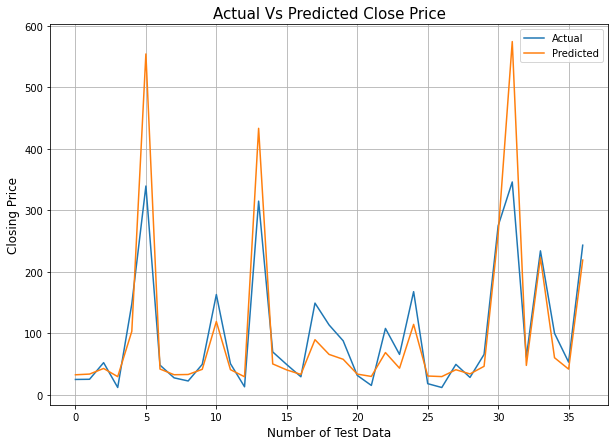

In [136]:
#Visualizing actual vs predicted price for Liner Regression
plt.figure(figsize=(10,7))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.title('Actual Vs Predicted Close Price', fontsize =15)
plt.legend(['Actual','Predicted'], fontsize=10)
plt.xlabel('Number of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid()

#**2. Lasso Regression**

####Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean.

In [137]:
# Data fitting in Lasso regression
lasso=Lasso(alpha=0.005,max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.005, max_iter=3000)

In [138]:
#Checking Training accuracy of Lasso Regression
round(lasso.score(x_train,y_train),4)

0.8144

In [139]:
#prediction of test data.
y_lasso_pred=lasso.predict(x_test)
y_lasso_pred

array([1.52055514, 1.53577312, 1.64073848, 1.48007004, 2.01461217,
       2.74090035, 1.63239804, 1.52091165, 1.52915367, 1.62459958,
       2.07755332, 1.61836076, 1.47805033, 2.62981621, 1.70703685,
       1.61429394, 1.52834077, 1.95620175, 1.81267257, 1.76363424,
       1.53587639, 1.48613456, 1.84020793, 1.63734843, 2.05819259,
       1.49501579, 1.48143852, 1.61577847, 1.53975454, 1.67409294,
       2.40045283, 2.75857291, 1.68748277, 2.3490824 , 1.78025847,
       1.62693942, 2.33097337])

In [140]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#**Evaluation Metrics of Lasso Regression**

In [141]:
# Checking the test Performance of lasso regression
print(f"Value of Mean Squared Error : {round(mean_squared_error(y_test, y_lasso_pred),4)}")
print(f"Value of Root Mean Squared Error : {round(math.sqrt(mean_squared_error(y_test, y_lasso_pred)),4)}")
print(f"Value of Mean Absolute Error : {round(mean_absolute_error(y_test, y_lasso_pred),4)}")
print(f"Value of Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_test, y_lasso_pred),4)}")
print(f"Value of R2 : {round(r2_score(y_test, y_lasso_pred),4)}")

Value of Mean Squared Error : 0.032
Value of Root Mean Squared Error : 0.179
Value of Mean Absolute Error : 0.1523
Value of Mean Absolute Percentage Error : 0.0962
Value of R2 : 0.82


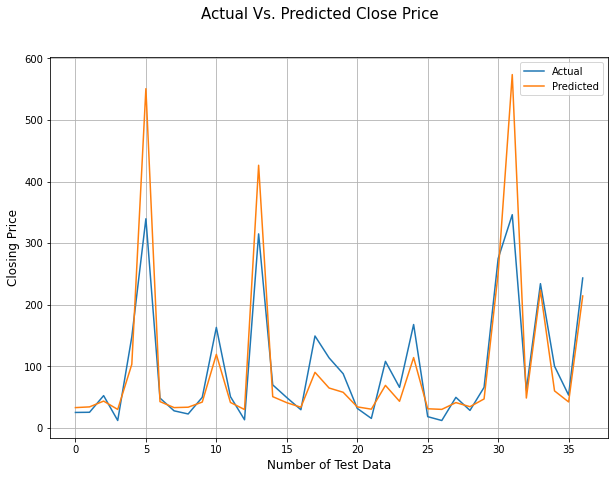

In [142]:
#Visualizing actual vs predicted price for Lasso Regression
plt.figure(figsize=(10,7))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_lasso_pred))
plt.suptitle('Actual Vs. Predicted Close Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=10)
plt.xlabel('Number of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**Cross Validation on Lasso Regression**

####Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.

In [143]:
# Hyper-Parameter Tuning for Lasso Regression
lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)


In [144]:
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [145]:
print(f"The best fit alpha value is found out to be : {round(lasso_regressor.best_params_['alpha'], 4)}")
print(f"The negative mean squared error is:{round (lasso_regressor.best_score_,4)}")

The best fit alpha value is found out to be : 0.01
The negative mean squared error is:-0.0352


In [146]:
#prediction 
y_lasso_pred_cv = lasso_regressor.predict(x_test)
y_lasso_pred_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [147]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#**Evaluation Metrics of Lasso Regression after Validation**

In [148]:
#Test performance of Lasso after Cross-Validation
print(f"Value of Mean Squared Error  : {round(mean_squared_error(y_test, y_lasso_pred_cv), 4)}")
print(f"Value of Root Mean Squared Error : {round(math.sqrt(mean_squared_error(y_test, y_lasso_pred_cv)), 4)}")
print(f"Value of Mean Absolute Error : {round(mean_absolute_error(y_test, y_lasso_pred_cv), 4)}")
print(f"Value of Mean Absolute Percentage Error :{round(mean_absolute_percentage_error(y_test, y_lasso_pred_cv), 4)}")
print(f"Value of R2 : {round(r2_score(y_test, y_lasso_pred_cv), 4)}")

Value of Mean Squared Error  : 0.0322
Value of Root Mean Squared Error : 0.1795
Value of Mean Absolute Error : 0.1528
Value of Mean Absolute Percentage Error :0.0968
Value of R2 : 0.819


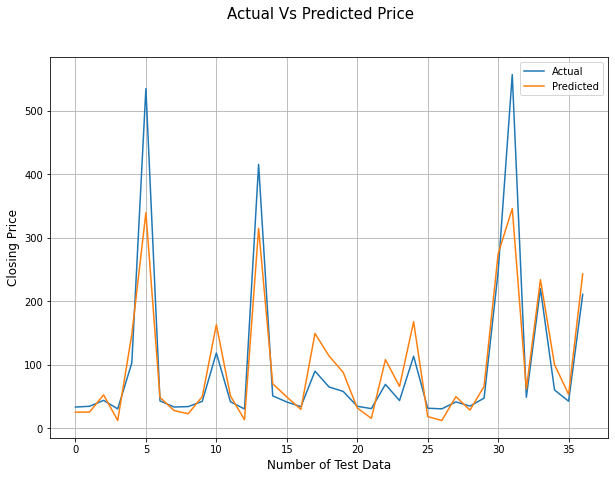

In [149]:
#Visualizing actual vs predicted price for Lasso Regression after Cross-Validation
plt.figure(figsize=(10,7))
plt.plot(10**(y_lasso_pred_cv))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 15)
plt.legend(['Actual','Predicted'], fontsize=10)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()


#**Ridge Regression**
####Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [150]:
# Data fitting in Ridge Regression
ridge = Ridge (alpha= 0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [151]:
# checking the accuracy of Ridge Regression
round(ridge.score(x_train, y_train), 4)

0.8147

In [152]:
#prediction of test data.
y_ridge_pred = ridge.predict(x_test)
y_ridge_pred

array([1.51725986, 1.53215164, 1.63600352, 1.47552735, 2.01524649,
       2.74546591, 1.6270459 , 1.51820847, 1.52403533, 1.62122179,
       2.07792883, 1.61563413, 1.47313494, 2.63727671, 1.7042382 ,
       1.61066104, 1.5249501 , 1.95487086, 1.81790128, 1.76386063,
       1.53181029, 1.48079356, 1.8391624 , 1.63839195, 2.06005015,
       1.49026998, 1.47689613, 1.61381392, 1.53558533, 1.66974486,
       2.41507786, 2.76158664, 1.68339463, 2.35025992, 1.78185548,
       1.62422136, 2.33989198])

In [153]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#**Evaluation Metrics of Ridge Regression**

In [154]:
# Checking the test Performance of Ridge regression
print(f"Value of Mean Squared Error : {round(mean_squared_error(y_test, y_ridge_pred),4)}")
print(f"Value of Root Mean Squared Error : {round(math.sqrt(mean_squared_error(y_test, y_ridge_pred)),4)}")
print(f"Value of Mean Absolute Error : {round(mean_absolute_error(y_test, y_ridge_pred),4)}")
print(f"Value of Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_test, y_ridge_pred),4)}")
print(f"Value of R2 : {round(r2_score(y_test, y_ridge_pred),4)}")

Value of Mean Squared Error : 0.0317
Value of Root Mean Squared Error : 0.1779
Value of Mean Absolute Error : 0.1514
Value of Mean Absolute Percentage Error : 0.0955
Value of R2 : 0.8221


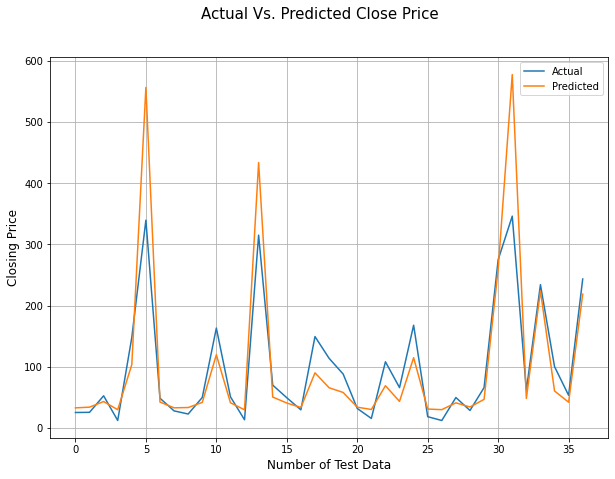

In [155]:
#Visualizing actual vs predicted price for Ridge Regression
plt.figure(figsize=(10,7))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_ridge_pred))
plt.suptitle('Actual Vs. Predicted Close Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=10)
plt.xlabel('Number of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**Cross Validation on Ridge Regression**

In [156]:
# Hyper-Parameter Tuning for Ridge Regression

ridge = Ridge()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [157]:
ridge_regressor.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [158]:
print(f"The best fit alpha value is found out to be : {round(ridge_regressor.best_params_['alpha'], 4)}")
print(f" The negative mean squared error is:{round (ridge_regressor.best_score_,4)}")

The best fit alpha value is found out to be : 10
 The negative mean squared error is:-0.0352


In [159]:
#prediction 
y_ridge_pred_cv = ridge_regressor.predict(x_test)
y_ridge_pred_cv

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [160]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

#**Evaluation Metrics of Ridge Regression after Cross-Validation**

In [161]:
#Test performance of Lasso after Cross-Validation
print(f"Value of Mean Squared Error  : {round(mean_squared_error(y_test, y_ridge_pred_cv), 4)}")
print(f"Value of Root Mean Squared Error : {round(math.sqrt(mean_squared_error(y_test, y_ridge_pred_cv)), 4)}")
print(f"Value of Mean Absolute Error : {round(mean_absolute_error(y_test, y_ridge_pred_cv), 4)}")
print(f"Value of Mean Absolute Percentage Error :{round(mean_absolute_percentage_error(y_test, y_ridge_pred_cv), 4)}")
print(f"Value of R2 : {round(r2_score(y_test, y_ridge_pred_cv), 4)}")

Value of Mean Squared Error  : 0.0325
Value of Root Mean Squared Error : 0.1804
Value of Mean Absolute Error : 0.1531
Value of Mean Absolute Percentage Error :0.0968
Value of R2 : 0.8172


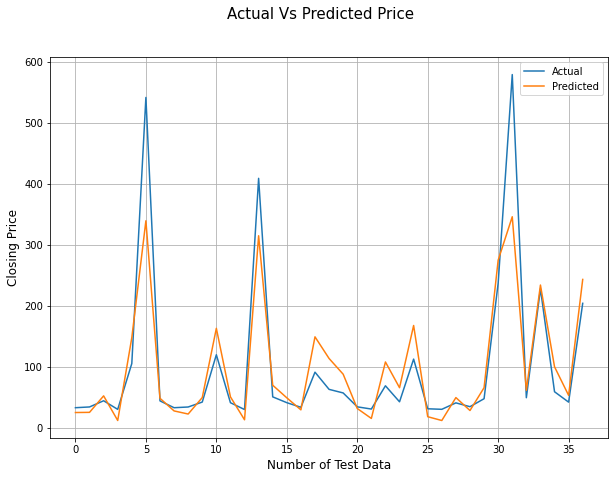

In [162]:
#Visualizing actual vs predicted price for Ridge Regression after Cross-Validation
plt.figure(figsize=(10,7))
plt.plot(10**(y_ridge_pred_cv))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 15)
plt.legend(['Actual','Predicted'], fontsize=10)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()


#**Elastic Net Regression**
####Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [163]:
# Data fitting in Elastic Net Regression
elastic_reg=ElasticNet(alpha=0.1)
elastic_reg.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [164]:
# checking the accuracy of Elastic Net Regression
round(elastic_reg.score(x_train,y_train),4)


0.7958

In [165]:
#prediction 
y_Elastic_pred= elastic_reg.predict(x_test)
y_Elastic_pred

array([1.56086628, 1.57468956, 1.67199754, 1.52786225, 1.99947735,
       2.620323  , 1.66975894, 1.56099604, 1.57327896, 1.65381518,
       2.04818128, 1.64463306, 1.52491149, 2.51497513, 1.72340633,
       1.64475613, 1.56826762, 1.94476918, 1.80713181, 1.769077  ,
       1.57643749, 1.53436335, 1.83898052, 1.65870367, 2.02548893,
       1.53981805, 1.52917355, 1.64223008, 1.57915854, 1.69956403,
       2.3103639 , 2.64491655, 1.71211439, 2.29131841, 1.78218876,
       1.65297013, 2.25223609])

In [166]:
np.array(y_pred)

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])


#**Evaluation Metrics of Elastic Net Regression**

In [167]:
# Checking the test Performance of Elastic Net regression
print(f"Value of Mean Squared Error : {round(mean_squared_error(y_test, y_Elastic_pred),4)}")
print(f"Value of Root Mean Squared Error : {round(math.sqrt(mean_squared_error(y_test, y_Elastic_pred)),4)}")
print(f"Value of Mean Absolute Error : {round(mean_absolute_error(y_test, y_Elastic_pred),4)}")
print(f"Value of Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_test, y_Elastic_pred),4)}")
print(f"Value of R2 : {round(r2_score(y_test, y_Elastic_pred),4)}")

Value of Mean Squared Error : 0.0364
Value of Root Mean Squared Error : 0.1908
Value of Mean Absolute Error : 0.1574
Value of Mean Absolute Percentage Error : 0.1024
Value of R2 : 0.7955


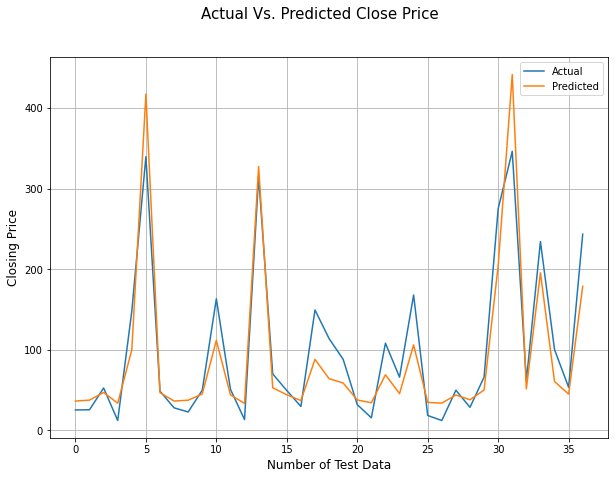

In [168]:
#Visualizing actual vs predicted price for Elastic Net Regression
plt.figure(figsize=(10,7))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_Elastic_pred))
plt.suptitle('Actual Vs. Predicted Close Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=10)
plt.xlabel('Number of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**Cross Validation on Elastic Net Regression**

In [169]:
# Hyper-Parameter Tuning for Elastic Net Regression
elastic = ElasticNet()
parameters ={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
elastic_regressor = GridSearchCV(elastic, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [170]:
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [171]:
print(f"The best fit alpha value is found out to be : {round(elastic_regressor.best_params_['alpha'], 4)}")
print(f" The negative mean squared error is:{round (elastic_regressor.best_score_,4)}")

The best fit alpha value is found out to be : 0.01
 The negative mean squared error is:-0.0352


In [172]:
#prediction 
y_Elastic_pred_cv=elastic_regressor.predict(x_test)
y_Elastic_pred_cv

array([1.52105799, 1.53627489, 1.64173386, 1.48091166, 2.01545993,
       2.73789621, 1.63418999, 1.52146877, 1.53020336, 1.62514163,
       2.07710847, 1.61837806, 1.4786407 , 2.62613544, 1.70701107,
       1.61481893, 1.52890975, 1.95630241, 1.81205035, 1.76324166,
       1.53659629, 1.48704786, 1.83992319, 1.63743063, 2.05703221,
       1.49559658, 1.48229602, 1.61588921, 1.54033427, 1.67477993,
       2.3977538 , 2.75685587, 1.68831481, 2.34898467, 1.77977668,
       1.62707723, 2.32808165])

In [173]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [174]:
# Checking the test Performance of Elastic Net regression after Cross-Validation
print(f"Value of Mean Squared Error : {round(mean_squared_error(y_test, y_Elastic_pred_cv),4)}")
print(f"Value of Root Mean Squared Error : {round(math.sqrt(mean_squared_error(y_test, y_Elastic_pred_cv)),4)}")
print(f"Value of Mean Absolute Error : {round(mean_absolute_error(y_test, y_Elastic_pred_cv),4)}")
print(f"Value of Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_test, y_Elastic_pred_cv),4)}")
print(f"Value of R2 : {round(r2_score(y_test, y_Elastic_pred_cv),4)}")

Value of Mean Squared Error : 0.0321
Value of Root Mean Squared Error : 0.1791
Value of Mean Absolute Error : 0.1524
Value of Mean Absolute Percentage Error : 0.0963
Value of R2 : 0.8198


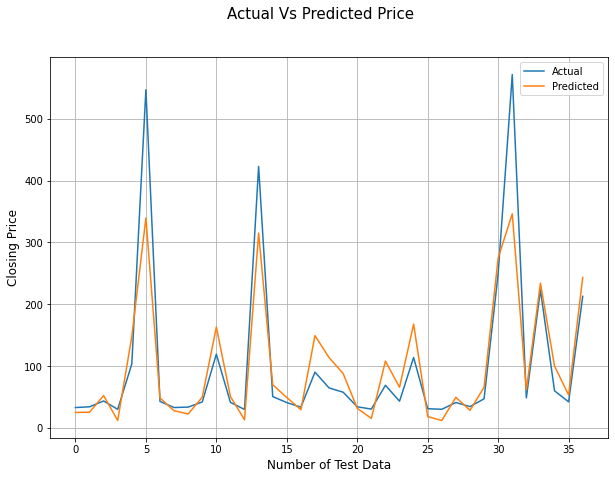

In [175]:
#Visualizing actual vs predicted price for Elastic Net Regression after Cross-Validation
plt.figure(figsize=(10,7))
plt.plot(10**(y_Elastic_pred_cv))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 15)
plt.legend(['Actual','Predicted'], fontsize=10)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

#**XG Boost Regression**
####A strong method for creating supervised regression models is XGBoost. By understanding this statement's (XGBoost) objective function and base learners, one can infer its accuracy. A regularisation term and a loss function are both part of the objective function. It provides information on the difference between actual and predicted values, or how far the model's predictions differ from the actual values.

In [176]:
# Data fitting in XG Boost Regression
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train,y_train)

[21:56:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [177]:
# checking the accuracy of XG Boost Regression
round(xgb_reg.score(x_train,y_train),4)

0.999

In [178]:
#Prediction
y_XG_pred = xgb_reg.predict(x_test)
y_XG_pred

array([1.3240345, 1.4481571, 1.7491498, 1.1570746, 2.1957493, 2.5145776,
       1.6748834, 1.402919 , 1.4481571, 1.7121533, 2.2350554, 1.7019634,
       1.097817 , 2.5032344, 1.8511137, 1.6865689, 1.443876 , 2.142931 ,
       2.006299 , 1.9523453, 1.4481571, 1.1984308, 2.025753 , 1.7286012,
       2.2308073, 1.2921474, 1.1570746, 1.7182921, 1.4809968, 1.7896991,
       2.4235322, 2.5344093, 1.8577319, 2.3706326, 1.9546288, 1.7555296,
       2.3739333], dtype=float32)

In [179]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [180]:
# Checking the test Performance of XG Boost regression
print(f"Value of Mean Squared Error : {round(mean_squared_error(y_test, y_XG_pred),4)}")
print(f"Value of Root Mean Squared Error : {round(math.sqrt(mean_squared_error(y_test, y_XG_pred)),4)}")
print(f"Value of Mean Absolute Error : {round(mean_absolute_error(y_test, y_XG_pred),4)}")
print(f"Value of Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_test, y_XG_pred),4)}")
print(f"Value of R2 : {round(r2_score(y_test, y_XG_pred),4)}")

Value of Mean Squared Error : 0.0016
Value of Root Mean Squared Error : 0.0394
Value of Mean Absolute Error : 0.0303
Value of Mean Absolute Percentage Error : 0.0196
Value of R2 : 0.9913


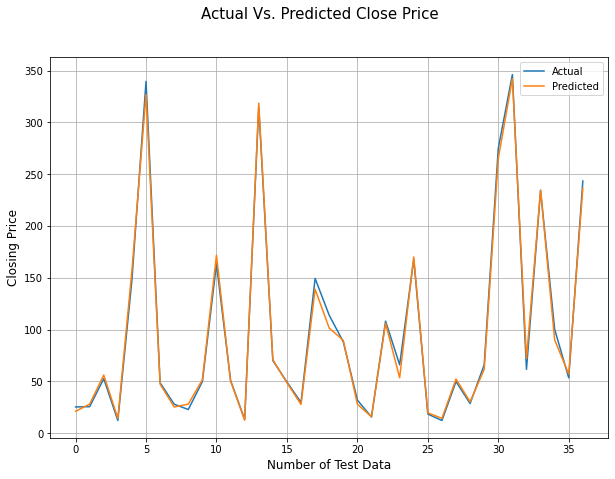

In [181]:
#Visualizing actual vs predicted price for XG Boost Regression
plt.figure(figsize=(10,7))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_XG_pred))
plt.suptitle('Actual Vs. Predicted Close Price', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=10)
plt.xlabel('Number of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#**Conclusion:**

####1. The tendency of Yes Bank's stock's Close, Open, High, and Low prices increased until 2018 and then unexpectedly decreased after fraud case of Rana Kapoor.
####2. The target variable is highly dependent on input variables.
####3. Each independent variable has a strong correlation with the others (Multicollinearity)
####4. The R squared values for linear, lasso, and ridge regressions are nearly identical.
####5. On the basis of RMSE(Root Mean Squared Error) and MAPE(Mean Absolute Percentage Error), I compared 5 models (Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, and XGBoost Regression).
####6. The dependent variable ( Closing Price ) and the independent variables (High, Low, and Open) have a direct correlation. 
####7. With the lowest RMSE (0.0394) and MAPE (0.0196) as well as the highest r2 score (0.9913), XGBoost Regression is the best model.